In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
path = kagglehub.dataset_download("batthulavinay/indian-food-nutrition")
print("Dataset downloaded to:", path)


100%|██████████| 36.8k/36.8k [00:00<00:00, 34.2MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/batthulavinay/indian-food-nutrition/versions/3


In [4]:
import os
print(os.listdir(path))


['Indian_Food_Nutrition_Processed.csv']


In [5]:
df = pd.read_csv(path + "/Indian_Food_Nutrition_Processed.csv")
print(df.head())  # Display first 5 rows


                     Dish Name  Calories (kcal)  Carbohydrates (g)  \
0         Hot tea (Garam Chai)            16.14               2.58   
1               Instant coffee            23.16               3.65   
2               Espreso coffee            51.54               6.62   
3                     Iced tea            10.34               2.70   
4  Raw mango drink (Aam panna)            35.92               9.05   

   Protein (g)  Fats (g)  Free Sugar (g)  Fibre (g)  Sodium (mg)  \
0         0.39      0.53            2.58       0.00         3.12   
1         0.64      0.75            3.62       0.00         4.92   
2         1.75      2.14            6.53       0.00        13.98   
3         0.03      0.01            2.70       0.00         0.23   
4         0.16      0.03            7.49       0.61        79.82   

   Calcium (mg)  Iron (mg)  Vitamin C (mg)  Folate (µg)  
0         14.20       0.02            0.50         1.80  
1         20.87       0.06            1.51         5.6

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dish Name          1014 non-null   object 
 1   Calories (kcal)    1014 non-null   float64
 2   Carbohydrates (g)  1014 non-null   float64
 3   Protein (g)        1014 non-null   float64
 4   Fats (g)           1014 non-null   float64
 5   Free Sugar (g)     1014 non-null   float64
 6   Fibre (g)          1014 non-null   float64
 7   Sodium (mg)        1014 non-null   float64
 8   Calcium (mg)       1014 non-null   float64
 9   Iron (mg)          1014 non-null   float64
 10  Vitamin C (mg)     932 non-null    float64
 11  Folate (µg)        932 non-null    float64
dtypes: float64(11), object(1)
memory usage: 95.2+ KB
None
       Calories (kcal)  Carbohydrates (g)  Protein (g)     Fats (g)  \
count      1014.000000        1014.000000  1014.000000  1014.000000   
mean        233.7358

In [8]:
print(df.isnull().sum())
print(df.isnull())

Dish Name             0
Calories (kcal)       0
Carbohydrates (g)     0
Protein (g)           0
Fats (g)              0
Free Sugar (g)        0
Fibre (g)             0
Sodium (mg)           0
Calcium (mg)          0
Iron (mg)             0
Vitamin C (mg)       82
Folate (µg)          82
dtype: int64
      Dish Name  Calories (kcal)  Carbohydrates (g)  Protein (g)  Fats (g)  \
0         False            False              False        False     False   
1         False            False              False        False     False   
2         False            False              False        False     False   
3         False            False              False        False     False   
4         False            False              False        False     False   
...         ...              ...                ...          ...       ...   
1009      False            False              False        False     False   
1010      False            False              False        False     False 

In [10]:
df.dropna(inplace=True)

In [21]:
print(df.isnull().sum())
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

Dish Name            0
Calories (kcal)      0
Carbohydrates (g)    0
Protein (g)          0
Fats (g)             0
Free Sugar (g)       0
Fibre (g)            0
Sodium (mg)          0
Calcium (mg)         0
Iron (mg)            0
Vitamin C (mg)       0
Folate (µg)          0
dtype: int64


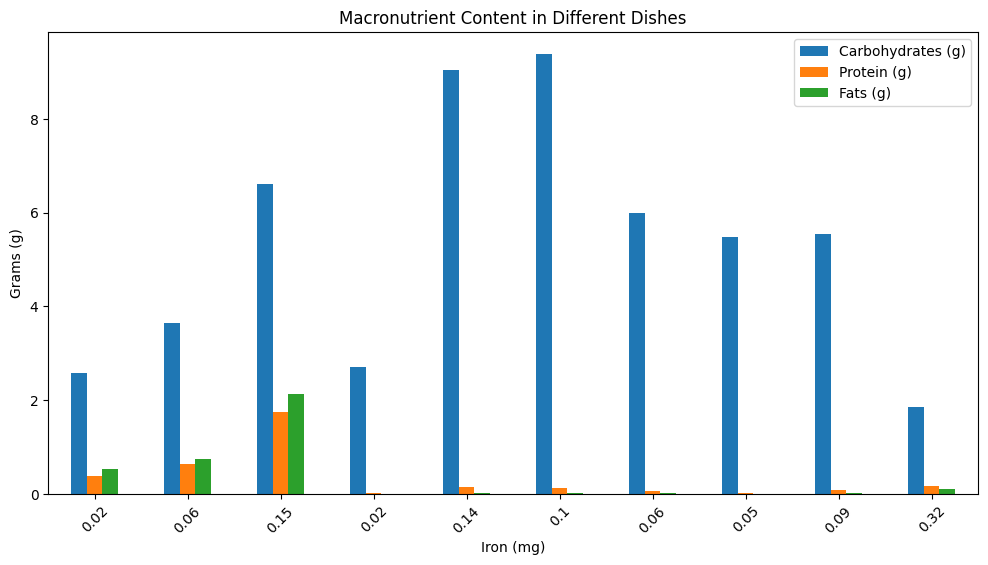

In [50]:
import matplotlib.pyplot as plt

df.iloc[:10].plot(x="Iron (mg)", y=["Carbohydrates (g)", "Protein (g)", "Fats (g)"], kind="bar", figsize=(12,6))
plt.title("Macronutrient Content in Different Dishes")
plt.ylabel("Grams (g)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


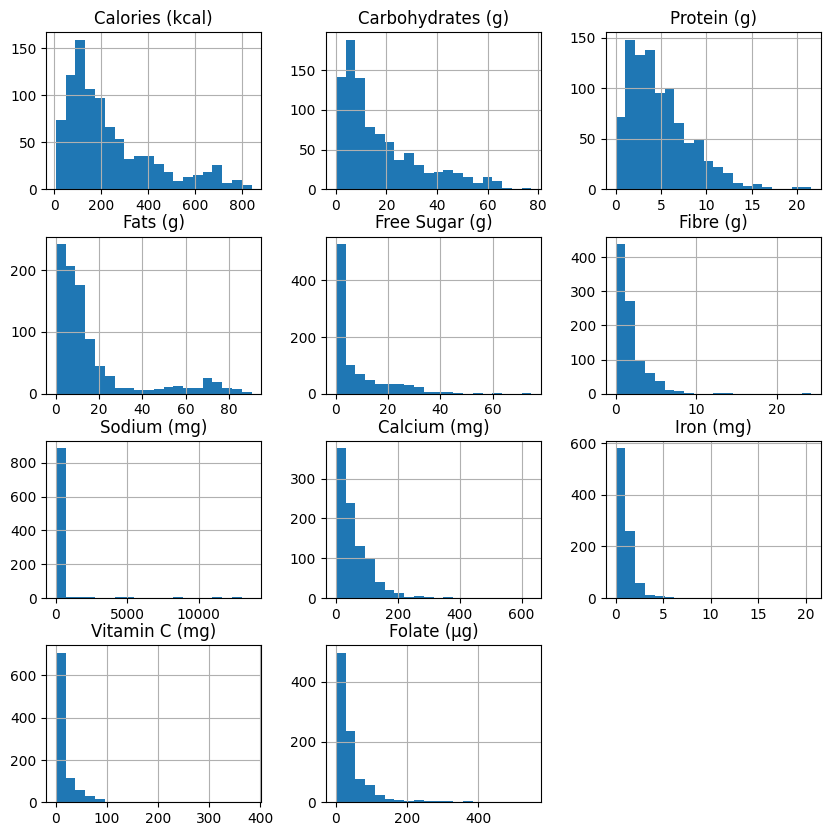

In [12]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10), bins=20)
plt.show()


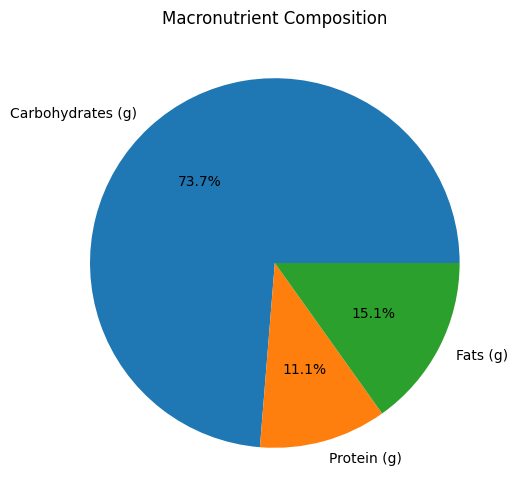

In [52]:
df.iloc[0][["Carbohydrates (g)", "Protein (g)", "Fats (g)"]].plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Macronutrient Composition")
plt.ylabel("")
plt.show()


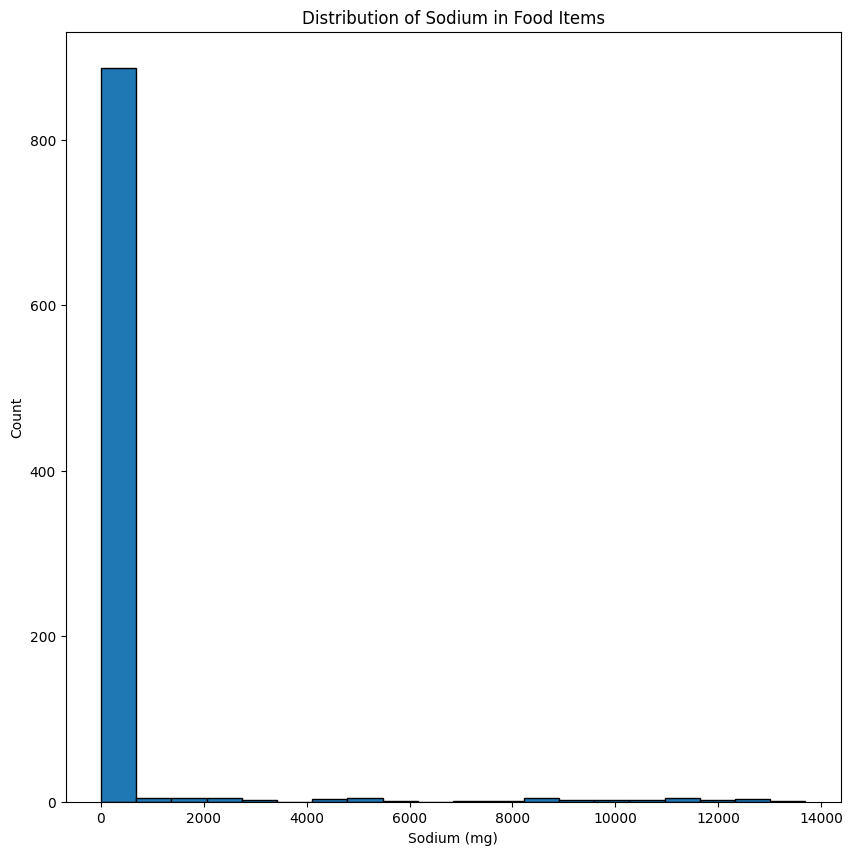

In [54]:
df["Sodium (mg)"].plot(kind="hist", bins=20, edgecolor="black", figsize=(10,10))
plt.title("Distribution of Sodium in Food Items")
plt.xlabel("Sodium (mg)")
plt.ylabel("Count")
plt.show()


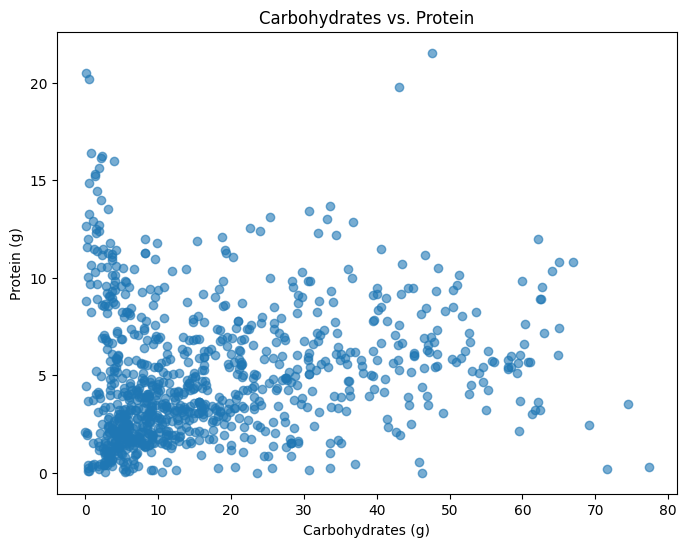

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(df["Carbohydrates (g)"], df["Protein (g)"], alpha=0.6)
plt.xlabel("Carbohydrates (g)")
plt.ylabel("Protein (g)")
plt.title("Carbohydrates vs. Protein")
plt.show()


In [51]:
print(df.columns)



Index(['Carbohydrates (g)', 'Protein (g)', 'Fats (g)', 'Free Sugar (g)',
       'Sodium (mg)', 'Calcium (mg)', 'Iron (mg)', 'Vitamin C (mg)',
       'Folate (µg)'],
      dtype='object')


In [31]:
df1 = df.iloc[:50]  # First 50 rows
df2 = df.iloc[50:]  # Remaining rows

# Concatenation
df_concat = pd.concat([df1, df2])
print(df_concat.shape)


(932, 11)


In [37]:
df.set_index(["Calories (kcal)", "Fibre (g)"], inplace=True)
print(df.head())


                           Carbohydrates (g)  Protein (g)  Fats (g)  \
Calories (kcal) Fibre (g)                                             
16.14           0.00                    2.58         0.39      0.53   
23.16           0.00                    3.65         0.64      0.75   
51.54           0.00                    6.62         1.75      2.14   
10.34           0.00                    2.70         0.03      0.01   
35.92           0.61                    9.05         0.16      0.03   

                           Free Sugar (g)  Sodium (mg)  Calcium (mg)  \
Calories (kcal) Fibre (g)                                              
16.14           0.00                 2.58         3.12         14.20   
23.16           0.00                 3.62         4.92         20.87   
51.54           0.00                 6.53        13.98         58.10   
10.34           0.00                 2.70         0.23          1.18   
35.92           0.61                 7.49        79.82          7.08  

In [43]:
grouped = df.groupby("Calcium (mg)").mean()
print(grouped)


              Carbohydrates (g)  Protein (g)  Fats (g)  Free Sugar (g)  \
Calcium (mg)                                                             
0.00                      46.15         0.00      0.00           41.54   
0.86                       0.00         2.10      1.78            0.00   
1.18                       2.70         0.03      0.01            2.70   
1.58                       0.40         0.07      0.56            0.24   
1.59                       5.16         0.56      0.14            3.96   
...                         ...          ...       ...             ...   
355.78                    30.88         9.82     27.96           30.43   
358.61                    34.43        12.21     24.09           33.37   
466.48                    33.15        13.00     17.86           32.38   
588.91                    29.15         9.13     10.96            1.48   
631.82                    43.50        10.70     19.64           38.63   

              Sodium (mg)  Iron (mg) 

In [47]:
df_pivot = pd.pivot_table(df, values="Carbohydrates (g)", index="Vitamin C (mg)", aggfunc="mean")
print(df_pivot)


                Carbohydrates (g)
Vitamin C (mg)                   
0.00                    37.976957
0.01                    32.378571
0.02                    34.344000
0.03                    45.092667
0.04                     9.400000
...                           ...
143.50                  30.570000
179.90                   5.900000
245.70                   3.780000
301.60                   1.050000
382.64                   8.020000

[649 rows x 1 columns]
